In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [25]:
df_scrap = pd.read_csv("../data/scrap_2005_to_2009.csv", delimiter=',')

In [26]:
df_scrap.head()

,eid,url,title,abstract,key_words,doi,isbn,issn,authors_raw,authors,affiliations_raw,affiliations,cuartil,document_type,source_type,publisher,language,sponsors,publication_year,page_count,info_more_full,citations_quartile,fwci_quartile,indexed_keywords,topic_prominence_name,topic_prominence_value,readers_count,news_mentions_count,citations_scopus_count,fwci_value,zero_hunger,clean_water,affordable_energy,industry_innovation
0,2-s2.0-28444483175,https://www.scopus.com/record/display.uri?eid=...,Pathogenicity of white spot syndrome virus on ...,White Spot Syndrome Virus (WSSV) has decimated...,"Breeding, Challenge test, Larval stages, Penae...",10.1016/j.aquaculture.2005.03.044,NaN,00448486,"Pérez, Franklin\na, b, c\nSend mail to Pérez F...","Pérez, Franklin; Volckaert, Filip A.M.; Calder...","a Fundación CENAIM-ESPOL, Campus Gustavo Galin...","a Fundación CENAIM-ESPOL, Campus Gustavo Galin...",Q2,Article,Journal,NaN,English,NaN,2005.0,6,"AquacultureVolume 250, Issue 3-4, Pages 586 - ...",Q3,Q4,"Decapoda (Crustacea);, Litopenaeus vannamei;, ...",White Spot Syndrome Virus; Shrimp; Viral Disease,92.293,71.0,NaN,3161th percentile,0.56,NaN,NaN,NaN,NaN
1,2-s2.0-33751302754,https://www.scopus.com/record/display.uri?eid=...,Detecting convergence in genetic algorithms wi...,The efficiency and effectiveness of Real-Coded...,"Convergence, Diversity index, Genetic algorith...",NaN,"0889864810, 978-088986481-8",NaN,"García, Sixto E.\na\nSend mail to García S.E.\...","García, Sixto E.; Saad, Maarouf; Akhrif, Ouassima",a Electrical and Computer Engineering Departme...,a Electrical and Computer Engineering Departme...,NaN,Conference Paper,Conference Proceedings,NaN,English,IASTED,2005.0,6,Proceedings of the IASTED International Confer...,NaN,NaN,"Computational methods;, Convergence of numeric...",Genetic Algorithm; Crossover Operator; Global ...,66.848,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2-s2.0-30144437338,https://www.scopus.com/record/display.uri?eid=...,Observed trends in indices of daily temperatur...,A workshop on enhancing climate change indices...,NaN,10.1175/JCLI3589.1,NaN,08948755,"Vincent, Lucie A.\na\nSend mail to Vincent L.A...","Vincent, Lucie A.; Peterson T.C.; Barros V.R.;...","a Meteorological Service of Canada, Downsview,...","a Meteorological Service of Canada, Downsview,...",Q1,Article• Bronze Open Access• Green Open Access,Journal,NaN,English,NaN,2005.0,45221,"Journal of ClimateOpen AccessVolume 18, Issue ...",Q1,Q4,"South America, Atmospheric temperature;, Clima...",China; Trend Analysis; Extreme Event,94.638,349.0,NaN,37195th percentile,3.97,NaN,NaN,NaN,NaN
3,2-s2.0-27344459102,https://www.scopus.com/record/display.uri?eid=...,Uncertainty evaluation of out-of-plane displac...,Electronic speckle-pattern interferometry (ESP...,"Displacement fields, Monte Carlo method, Speck...",10.1088/0957-0233/16/11/031,NaN,09570233,"Cordero, Raul R.\na, b;\nLabbé, Fernando\na\nS...","Cordero, Raul R.; Labbé, Fernando","a Universidad Técnica Federico Santa Maria, Va...","a Universidad Técnica Federico Santa Maria, Va...",Q3,Article,Journal,Institute of Physics Publishing,English,NaN,2005.0,21377,"Measurement Science and TechnologyVolume 16, I...",Q4,Q4,"Interferometry;, measurement method;, optical ...",Interferometry; Shearography; Vibration Analysis,74.926,7.0,NaN,348th percentile,0.25,NaN,NaN,NaN,NaN
4,2-s2.0-19944374128,https://www.scopus.com/record/display.uri?eid=...,Climatology of surface ultraviolet-radiation i...,"Despite the lack of long-term records, it is p...","Climatology, Ozone, UV irradiance",10.1016/j.enconman.2005.02.008,NaN,01968904,"Cordero, Raúl R.\na, b\nSend mail to Cordero R...","Cordero, Raúl R.; Roth, Pedro; Georgiev, Aleks...","a Universidad Técnica Federico Santa María, Va...","a Universidad Técnica Federico Santa María, Va...",Q3,Article,Journal,NaN,English,NaN,2005.0,12,"Energy Conversion and ManagementVolume 46, Iss...",Q4,NaN,"Clouds;, Correlation methods;, Distillation co...",Solar Radiation; Irradiance; Radi

In [3]:
df_all = pd.read_csv('../data/originals/sample2.csv', delimiter=',')
df_new_query = pd.read_csv("../data/originals/new_query.csv", delimiter=',')
df_scrap = pd.read_csv("../data/data_update/scrap_2.csv", delimiter=',')

In [4]:
df_scrap.shape, df_all.shape, df_new_query.shape

((4605, 30), (494, 61), (7934, 59))

In [5]:
df_scrap["TITULO"] = df_scrap["title"]

In [6]:
df_scrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   eid                     4605 non-null   object 
 1   url                     4605 non-null   object 
 2   title                   4605 non-null   object 
 3   abstract                4494 non-null   object 
 4   key_words               3953 non-null   object 
 5   doi                     4239 non-null   object 
 6   isbn                    1462 non-null   object 
 7   issn                    3754 non-null   object 
 8   cuartil                 3477 non-null   object 
 9   document_type           4605 non-null   object 
 10  source_type             4605 non-null   object 
 11  publisher               4438 non-null   object 
 12  language                4604 non-null   object 
 13  sponsors                499 non-null    object 
 14  publication_year        4293 non-null   

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NOMBRE                        494 non-null    object 
 1   IDDECINVPROYECTOPRODTERMIN    494 non-null    int64  
 2   IDDECINVPROYECTO              494 non-null    int64  
 3   IDDECINVTIPOPRODUCTOESPERADO  494 non-null    int64  
 4   TITULO                        494 non-null    object 
 5   ANIO                          494 non-null    int64  
 6   VOLUMEN                       494 non-null    int64  
 7   PAGINAS                       465 non-null    object 
 8   NOMBREREVISTA                 462 non-null    object 
 9   ISINDEX                       494 non-null    int64  
 10  BDREVISTA                     494 non-null    int64  
 11  ISSN                          386 non-null    object 
 12  FACTIMPACTO                   351 non-null    object 
 13  EDITO

In [8]:
df_new_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7934 entries, 0 to 7933
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDDECINVPROYECTOPRODTERMIN    7934 non-null   int64  
 1   IDDECINVPROYECTO              7932 non-null   float64
 2   IDDECINVTIPOPRODUCTOESPERADO  7934 non-null   int64  
 3   TITULO                        7934 non-null   object 
 4   ANIO                          7934 non-null   int64  
 5   VOLUMEN                       4641 non-null   float64
 6   PAGINAS                       4566 non-null   object 
 7   NOMBREREVISTA                 4298 non-null   object 
 8   ISINDEX                       4556 non-null   float64
 9   BDREVISTA                     4193 non-null   float64
 10  ISSN                          4141 non-null   object 
 11  FACTIMPACTO                   874 non-null    object 
 12  EDITORIAL                     352 non-null    object 
 13  EST

In [9]:
result = pd.merge(df_scrap, df_all, on="TITULO", how="left", suffixes=("_original", "_update"))
# result = pd.merge(df_scrap, df_new_query, on="TITULO", how="left", suffixes=("_original", "_update"))

In [10]:
result.keys()

Index(['eid', 'url', 'title', 'abstract', 'key_words', 'doi', 'isbn', 'issn',
       'cuartil', 'document_type', 'source_type', 'publisher', 'language',
       'sponsors', 'publication_year', 'page_count', 'info_more_full',
       'citations_quartile', 'fwci_quartile', 'indexed_keywords',
       'topic_prominence_name', 'topic_prominence_value', 'readers_count',
       'news_mentions_count', 'citations_scopus_count', 'fwci_value',
       'zero_hunger', 'clean_water', 'affordable_energy',
       'industry_innovation', 'TITULO', 'NOMBRE', 'IDDECINVPROYECTOPRODTERMIN',
       'IDDECINVPROYECTO', 'IDDECINVTIPOPRODUCTOESPERADO', 'ANIO', 'VOLUMEN',
       'PAGINAS', 'NOMBREREVISTA', 'ISINDEX', 'BDREVISTA', 'ISSN',
       'FACTIMPACTO', 'EDITORIAL', 'ESTADOPUBLICACION', 'ESPECIFICACION',
       'URL', 'ULTIMO_CAMBIO', 'NEVENTO', 'LEVENTO', 'FEVENTO', 'ADJUNTO',
       'FECHAPUBLICACION', 'RESUMEN', 'KEYS', 'ASIST_OBJETIV',
       'INNOVA_VERIFIC', 'LOGROS_SISTEMAC', 'RETOS_COMUNIC', 'IDUNIDAD

In [11]:
# result[["title", "TITULO", "NOMBRE", "DOI"]].info()

In [12]:
# 2. DataFrame de coincidencias (df_matched)
# Asumimos que 'NOMBRE' es una columna de df_all que indica un match si no es NaN.
# Si 'NOMBRE' pudiera existir en df_scrap y causar sufijo, ajusta el nombre (ej. 'NOMBRE_update')
# Por simplicidad, si 'NOMBRE' solo está en df_all, se llamará 'NOMBRE' en 'result'.
# Si 'NOMBRE' estuviera en ambos, y 'NOMBRE' de df_all es el indicador, sería 'NOMBRE_update'.
# Vamos a asumir que 'NOMBRE' es el nombre final en 'result' proveniente de df_all.
# if "NOMBRE" not in result.columns and "NOMBRE_update" in result.columns:
#     col_indicadora_match = "NOMBRE_update"
# elif "NOMBRE" in result.columns:
#     col_indicadora_match = "NOMBRE"
# else:
#     # Fallback si 'NOMBRE' o 'NOMBRE_update' no existen, esto podría indicar un problema con la premisa
#     # o que la columna indicadora es otra. Para el ejemplo, creamos una si no existe.
#     print("Advertencia: La columna 'NOMBRE' o 'NOMBRE_update' no se encontró en 'result'. Usando una columna dummy para 'df_matched'.")
#     # Esto es solo para que el código de ejemplo no falle. En tu caso real, asegúrate que la columna exista.
#     if not result.empty:
#         result['dummy_match_indicator'] = pd.Series([True] * len(result)) # Asumir todos son match para demo
#         col_indicadora_match = 'dummy_match_indicator'
#     else: # Si result está vacío
#         col_indicadora_match = None

col_indicadora_match = "NOMBRE"
col_indicadora_match = "ISSN"

if col_indicadora_match and not result.empty:
    df_matched = result[~result[col_indicadora_match].isna()].copy()
else:
    df_matched = pd.DataFrame() # DataFrame vacío si no hay indicador o result está vacío


# print(f"### Información del DataFrame 'result' ###")
# result.info()
print(f"\n### Información del DataFrame 'df_matched' ###")
if not df_matched.empty:
    df_matched.info()
else:
    print("df_matched está vacío.")


### Información del DataFrame 'df_matched' ###
<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 486 to 4624
Data columns (total 91 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   eid                           256 non-null    object 
 1   url                           256 non-null    object 
 2   title                         256 non-null    object 
 3   abstract                      254 non-null    object 
 4   key_words                     237 non-null    object 
 5   doi                           252 non-null    object 
 6   isbn                          47 non-null     object 
 7   issn                          234 non-null    object 
 8   cuartil                       106 non-null    object 
 9   document_type                 256 non-null    object 
 10  source_type                   256 non-null    object 
 11  publisher                     256 non-null    object 
 12  language          

In [13]:
# df_matched[["URL", "url"]]

In [14]:
# Filas en df_scrap que NO están en df_all (basado en TITULO)
# Lo del scrap que no esta en el de base de datos
df_scrap_no_match = df_scrap[~df_scrap['TITULO'].isin(df_all['TITULO'].unique())].copy()

# Filas en df_all que NO están en df_scrap (basado en TITULO)
df_all_no_match = df_all[~df_all['TITULO'].isin(df_scrap['TITULO'].unique())].copy()

# print("\n### df_scrap_no_match (Primeras 5 filas) ###")
# print(df_scrap_no_match.head())
print(f"Total de filas en df_scrap_no_match: {len(df_scrap_no_match)}")

# print("\n### df_all_no_match (Primeras 5 filas) ###")
# print(df_all_no_match.head())
print(f"Total de filas en df_all_no_match: {len(df_all_no_match)}")

Total de filas en df_scrap_no_match: 4310
Total de filas en df_all_no_match: 176


In [15]:
# # Pares de columnas a comparar.
# # Los nombres de columna aquí deben ser los que resultan DESPUÉS del merge en `df_matched` o `result`.
# # Si ambos tenían 'identificador_comun', serían 'identificador_comun_original' e 'identificador_comun_update'.
# column_pairs_to_compare = [
#     {'scrap_col': 'doi', 'all_col': 'DOI', 'name': 'DOI'},
#     {'scrap_col': 'url', 'all_col': 'URL', 'name': 'URL'},
#     {'scrap_col': 'abstract', 'all_col': 'RESUMEN', 'name': 'Abstract/Resumen'},
#     {'scrap_col': 'key_words', 'all_col': 'KEYS', 'name': 'Keywords'},
#     {'scrap_col': 'issn', 'all_col': 'ISSN', 'name': 'ISSN'}, 
#     {'scrap_col': 'cuartil', 'all_col': 'CUARTIL', 'name': 'Cuartil'} 
# ]

# if not df_matched.empty:
#     print("\n### Gráficos de Comparación en Registros Coincidentes (df_matched) ###")
#     for pair_info in column_pairs_to_compare:
#         col_scrap = pair_info['scrap_col']
#         col_all = pair_info['all_col']
#         plot_name = pair_info['name']

#         # Verificar si las columnas existen en df_matched
#         if col_scrap not in df_matched.columns:
#             print(f"Advertencia: La columna '{col_scrap}' (de df_scrap) no se encontró en df_matched. Saltando gráfico para {plot_name}.")
#             continue
#         if col_all not in df_matched.columns:
#             print(f"Advertencia: La columna '{col_all}' (de df_all) no se encontró en df_matched. Saltando gráfico para {plot_name}.")
#             continue

#         # Preparar datos para el gráfico, tratando NaNs
#         val_scrap = df_matched[col_scrap].fillna("VALOR_AUSENTE_SCRAP").astype(str)
#         val_all = df_matched[col_all].fillna("VALOR_AUSENTE_ALL").astype(str)

#         # Lógica de comparación
#         conditions = [
#             (val_scrap.str.lower() == val_all.str.lower()) & (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
#             (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL"),
#             (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
#             (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL") & (val_scrap.str.lower() != val_all.str.lower()),
#             (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL")
#         ]
#         choices = [
#             'Coinciden',
#             f'{col_scrap} presente, {col_all} ausente',
#             f'{col_scrap} ausente, {col_all} presente',
#             'Difieren (ambos presentes)',
#             'Ambos ausentes'
#         ]
        
#         comparison_status_col = f'{plot_name}_estado_comparacion'
#         df_matched[comparison_status_col] = np.select(conditions, choices, default='Otro')
        
#         status_counts = df_matched[comparison_status_col].value_counts()

#         if status_counts.empty:
#             print(f"No hay datos para graficar para {plot_name}.")
#             continue

#         plt.figure(figsize=(10, 7))
#         status_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'grey'])
#         plt.title(f'Comparación de {plot_name} ({col_scrap} vs {col_all})\nen Registros Coincidentes ({len(df_matched)} en total)')
#         plt.ylabel('Número de Registros')
#         plt.xlabel('Estado de Comparación')
#         plt.xticks(rotation=45, ha='right')
#         plt.tight_layout()
#         plt.show()
        
#         # Limpiar la columna de estado para la siguiente iteración si es necesario o para análisis posterior
#         # df_matched = df_matched.drop(columns=[comparison_status_col]) 
# else:
#     print("\nEl DataFrame 'df_matched' está vacío. No se pueden generar gráficos de comparación.")

# print("\n--- Resumen Final ---")
# print(f"Filas en df_scrap original: {len(df_scrap)}")
# print(f"Filas en df_all original: {len(df_all)}")
# print(f"Filas en result (merge): {len(result)}")
# if col_indicadora_match:
#     print(f"Filas en df_matched (coincidentes según '{col_indicadora_match}'): {len(df_matched)}")
# else:
#     print(f"Filas en df_matched (coincidentes): {len(df_matched)}")
# print(f"Filas en df_scrap_no_match: {len(df_scrap_no_match)}")
# print(f"Filas en df_all_no_match: {len(df_all_no_match)}")

In [16]:
# Pares de columnas a comparar.
# Los nombres de columna aquí deben ser los que resultan DESPUÉS del merge en `df_matched` o `result`.
# Si ambos tenían 'identificador_comun', serían 'identificador_comun_original' e 'identificador_comun_update'.
column_pairs_to_compare = [
    {'scrap_col': 'doi', 'all_col': 'DOI', 'name': 'DOI'},
    {'scrap_col': 'url', 'all_col': 'URL', 'name': 'URL'},
    {'scrap_col': 'abstract', 'all_col': 'RESUMEN', 'name': 'Abstract/Resumen'},
    {'scrap_col': 'key_words', 'all_col': 'KEYS', 'name': 'Keywords'},
    {'scrap_col': 'issn', 'all_col': 'ISSN', 'name': 'ISSN'}, 
    {'scrap_col': 'cuartil', 'all_col': 'CUARTIL', 'name': 'Cuartil'},
    {'scrap_col': 'publication_year', 'all_col': 'ANIO', 'name': 'Año'},
    {'scrap_col': 'citations_quartile', 'all_col': 'CUARTIL', 'name': 'CUARTIL citations_quartile'},
    {'scrap_col': 'fwci_quartile', 'all_col': 'CUARTIL', 'name': 'CUARTIL fwci_quartile'},
    	 
]

def show_description(df_temp):
    if not df_temp.empty:
        print("\n### Gráficos de Comparación en Registros Coincidentes (df_temp) ###")
        for pair_info in column_pairs_to_compare:
            col_scrap = pair_info['scrap_col']
            col_all = pair_info['all_col']
            plot_name = pair_info['name']

            # Verificar si las columnas existen en df_temp
            if col_scrap not in df_temp.columns:
                print(f"Advertencia: La columna '{col_scrap}' (de df_scrap) no se encontró en df_temp. Saltando gráfico para {plot_name}.")
                continue
            if col_all not in df_temp.columns:
                print(f"Advertencia: La columna '{col_all}' (de df_all) no se encontró en df_temp. Saltando gráfico para {plot_name}.")
                continue

            # Preparar datos para el gráfico, tratando NaNs
            val_scrap = df_temp[col_scrap].fillna("VALOR_AUSENTE_SCRAP").astype(str)
            val_all = df_temp[col_all].fillna("VALOR_AUSENTE_ALL").astype(str)

            # Lógica de comparación
            conditions = [
                (val_scrap.str.lower() == val_all.str.lower()) & (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
                (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL"),
                (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL"),
                (val_scrap != "VALOR_AUSENTE_SCRAP") & (val_all != "VALOR_AUSENTE_ALL") & (val_scrap.str.lower() != val_all.str.lower()),
                (val_scrap == "VALOR_AUSENTE_SCRAP") & (val_all == "VALOR_AUSENTE_ALL")
            ]
            choices = [
                'Coinciden',
                f'{col_scrap} presente, {col_all} ausente',
                f'{col_scrap} ausente, {col_all} presente',
                'Difieren (ambos presentes)',
                'Ambos ausentes'
            ]
            
            comparison_status_col = f'{plot_name}_estado_comparacion'
            df_temp[comparison_status_col] = np.select(conditions, choices, default='Otro')
            
            status_counts = df_temp[comparison_status_col].value_counts()

            if status_counts.empty:
                print(f"No hay datos para graficar para {plot_name}.")
                continue

            plt.figure(figsize=(10, 7))
            status_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'grey'])
            plt.title(f'Comparación de {plot_name} ({col_scrap} vs {col_all})\nen Registros Coincidentes ({len(df_temp)} en total)')
            plt.ylabel('Número de Registros')
            plt.xlabel('Estado de Comparación')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Limpiar la columna de estado para la siguiente iteración si es necesario o para análisis posterior
            # df_temp = df_temp.drop(columns=[comparison_status_col]) 
    else:
        print("\nEl DataFrame 'df_temp' está vacío. No se pueden generar gráficos de comparación.")

    print("\n--- Resumen Final ---")
    print(f"Filas en df_scrap original: {len(df_scrap)}")
    print(f"Filas en df_all original: {len(df_all)}")
    print(f"Filas en result (merge): {len(result)}")
    if col_indicadora_match:
        print(f"Filas en df_matched (coincidentes según '{col_indicadora_match}'): {len(df_matched)}")
    else:
        print(f"Filas en df_matched (coincidentes): {len(df_matched)}")
    print(f"Filas en df_scrap_no_match: {len(df_scrap_no_match)}")
    print(f"Filas en df_all_no_match: {len(df_all_no_match)}")


### Gráficos de Comparación en Registros Coincidentes (df_temp) ###


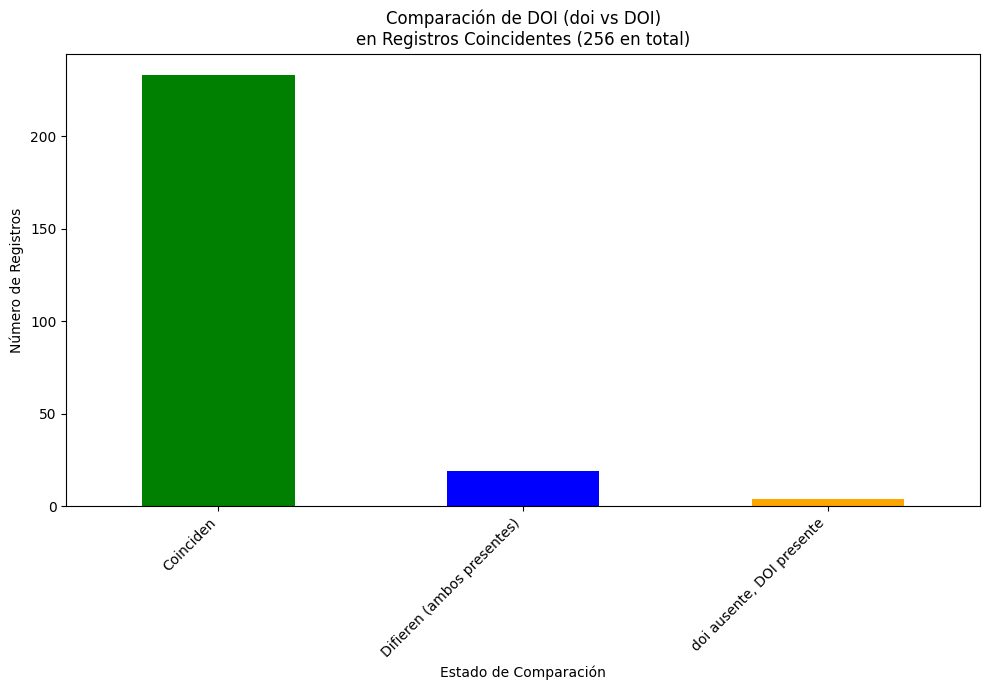

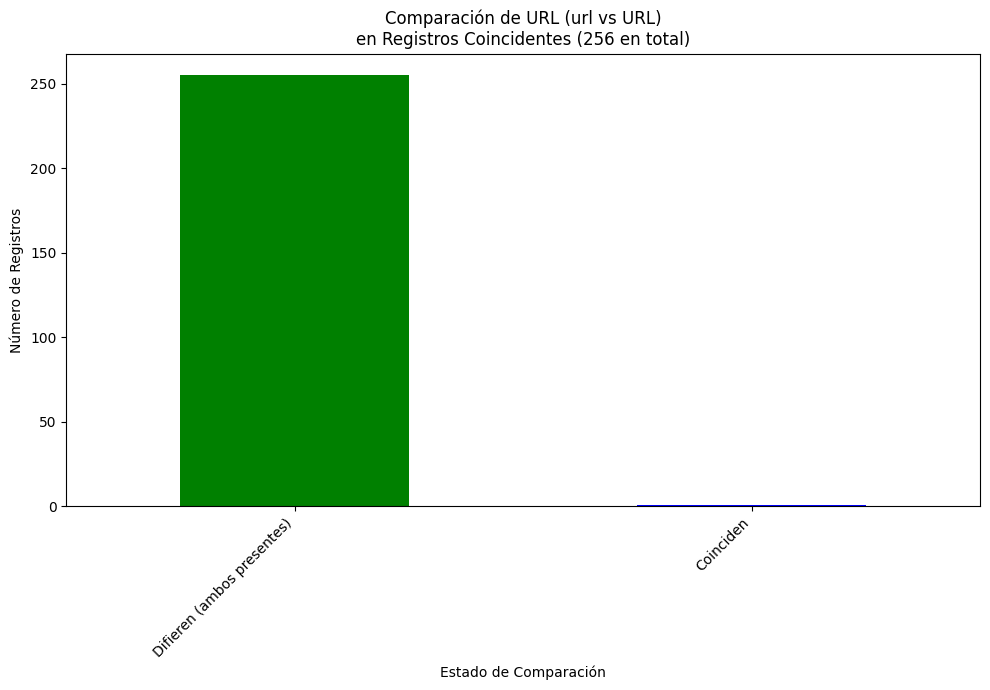

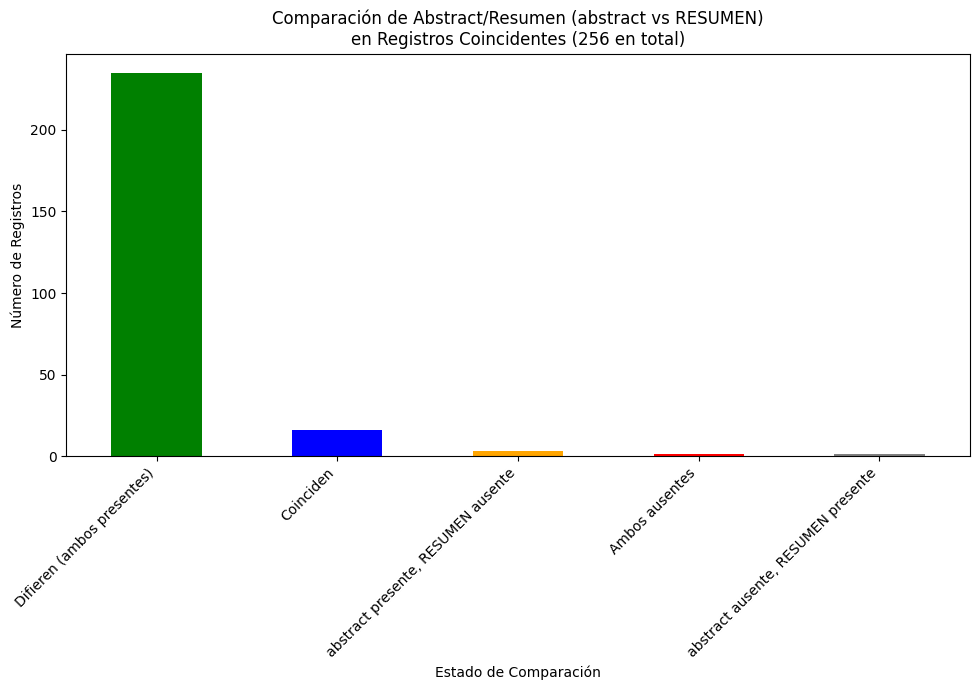

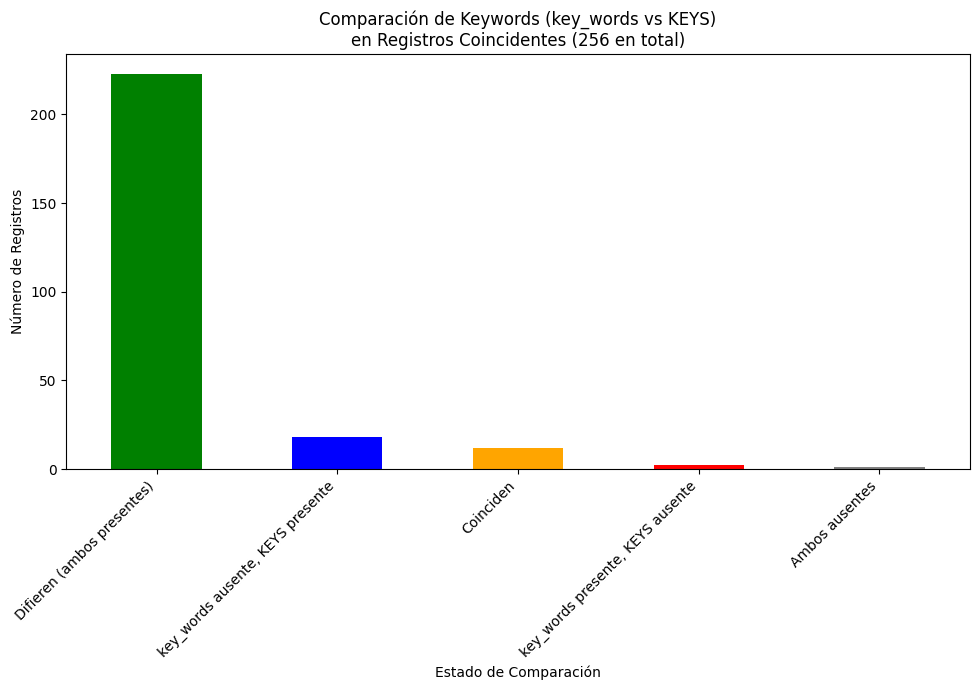

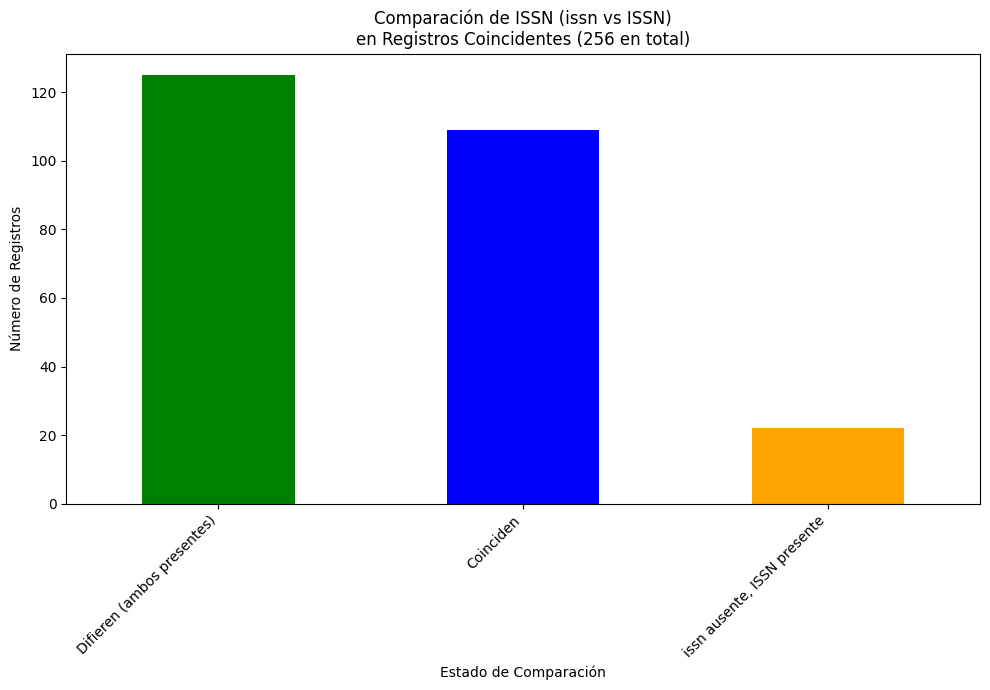

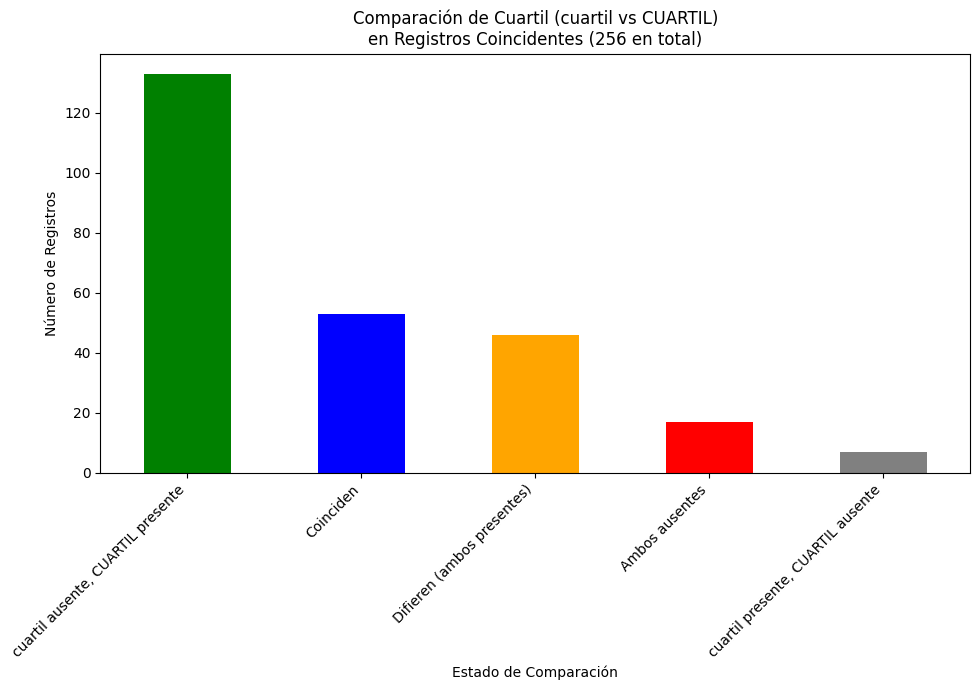

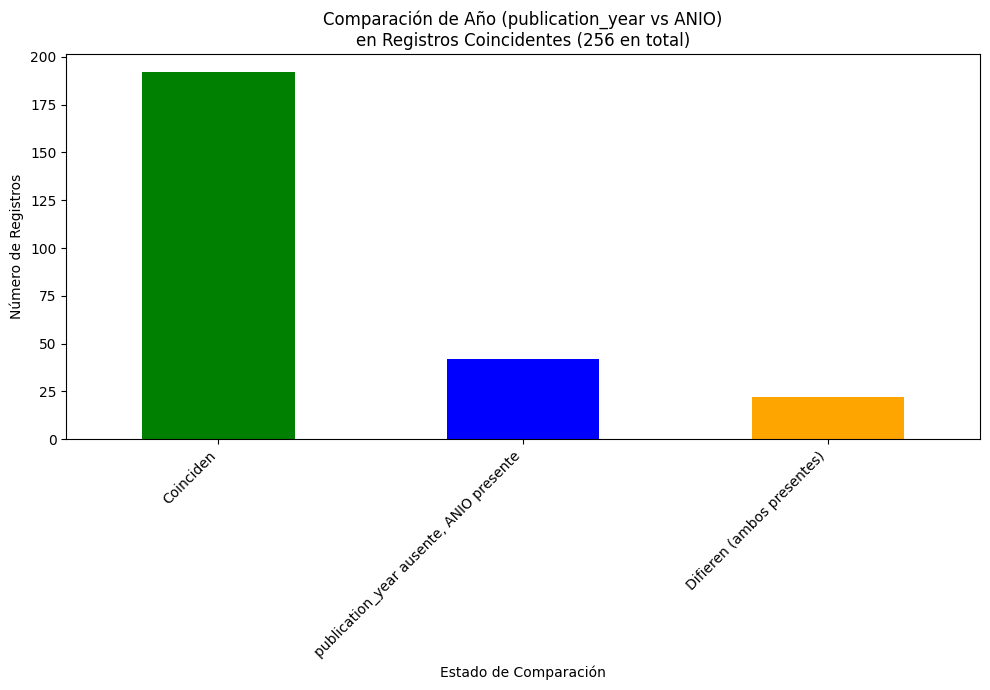

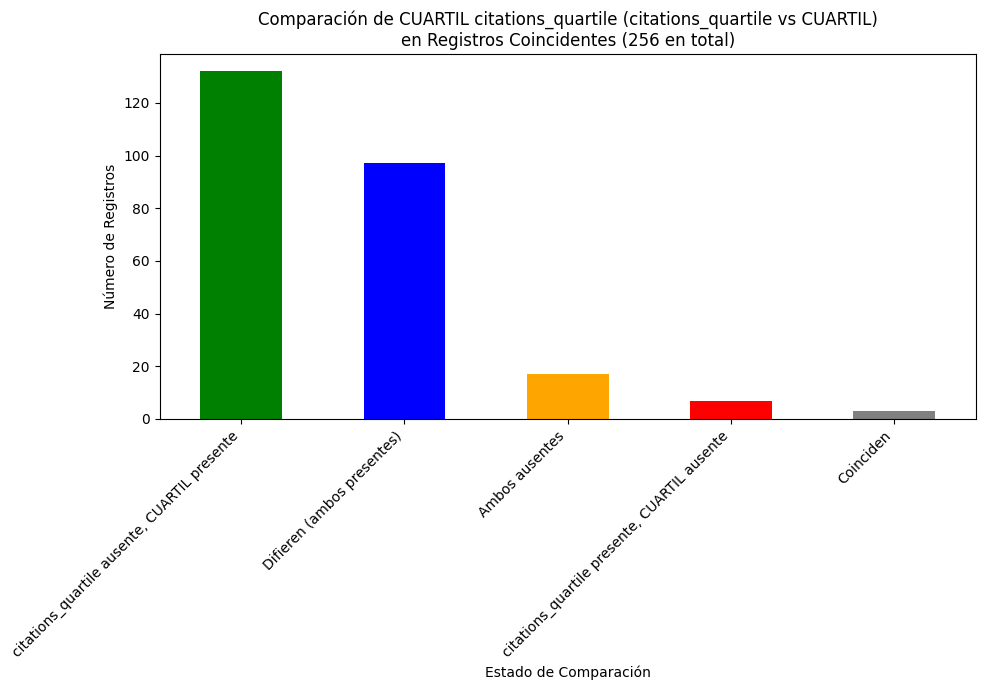

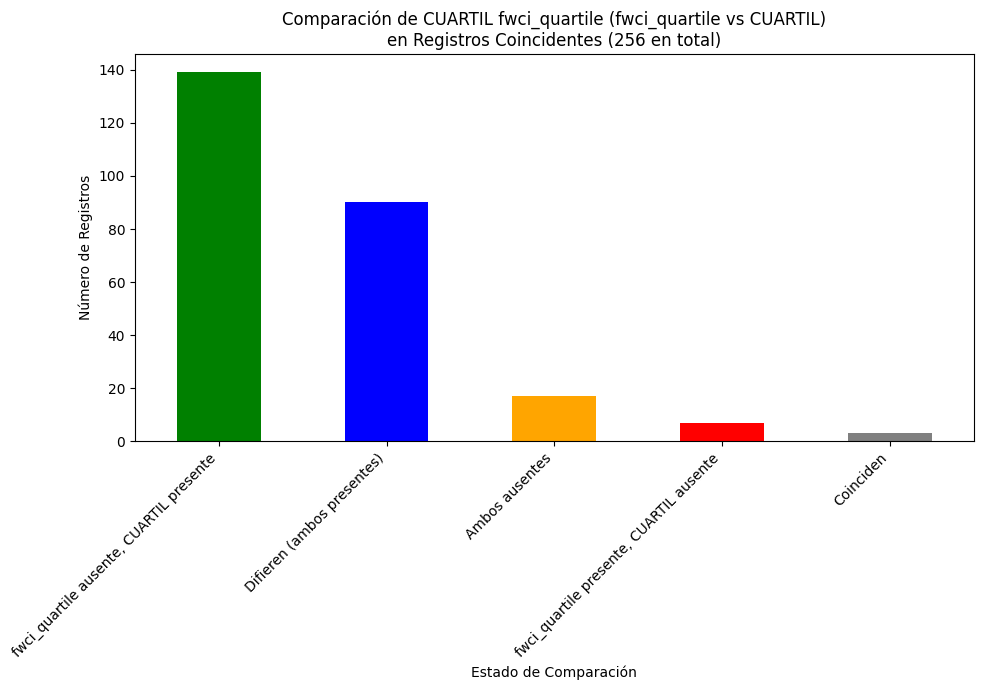


--- Resumen Final ---
Filas en df_scrap original: 4605
Filas en df_all original: 494
Filas en result (merge): 4628
Filas en df_matched (coincidentes según 'ISSN'): 256
Filas en df_scrap_no_match: 4310
Filas en df_all_no_match: 176


In [17]:
show_description(df_matched)


### Gráficos de Comparación en Registros Coincidentes (df_temp) ###


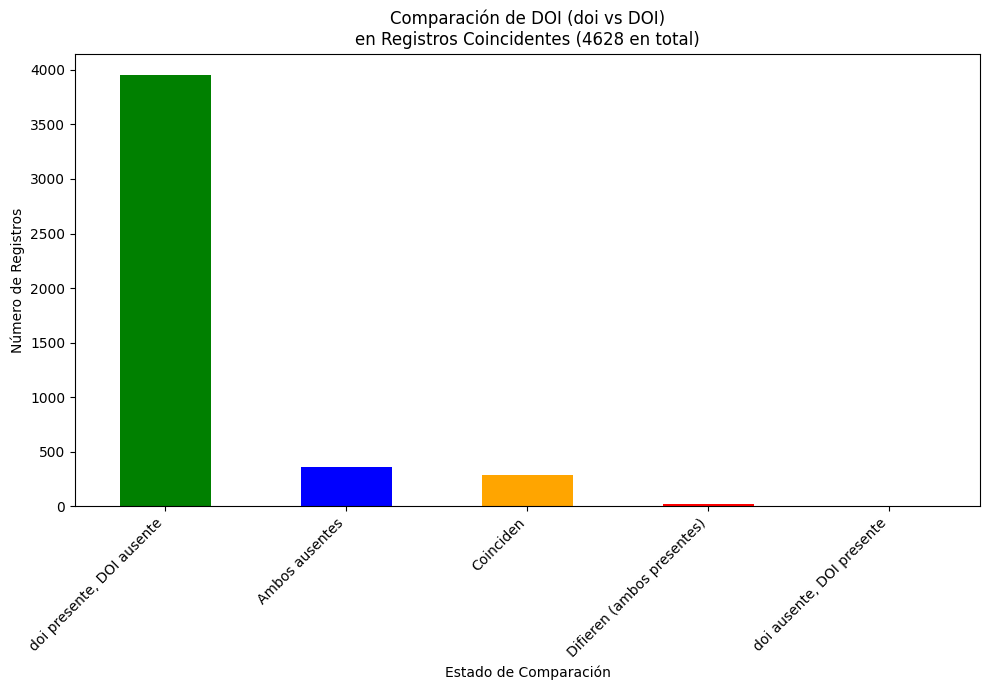

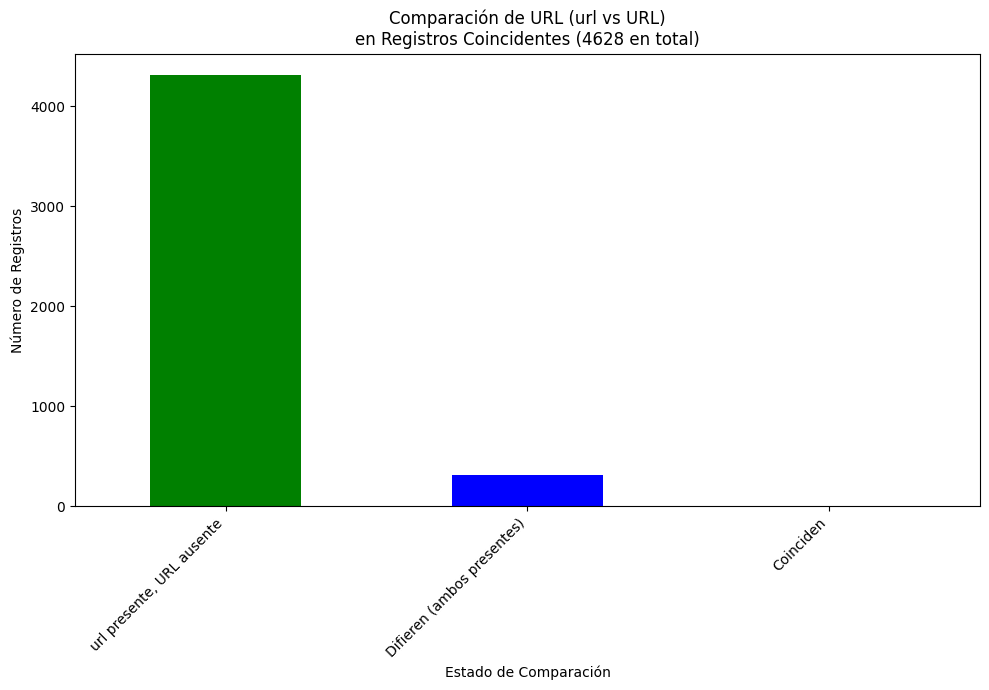

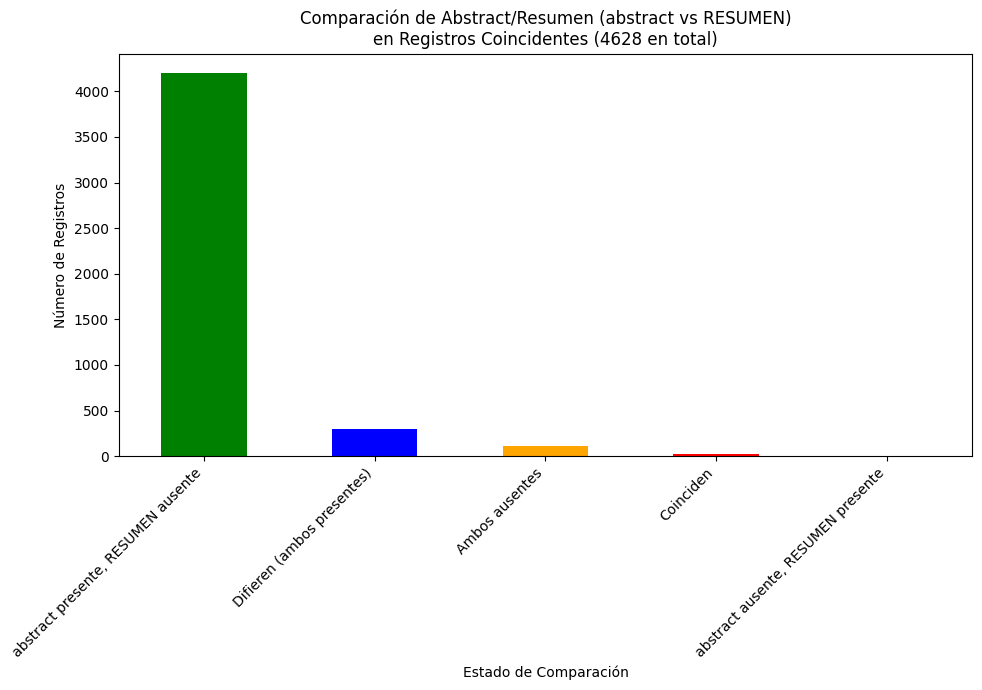

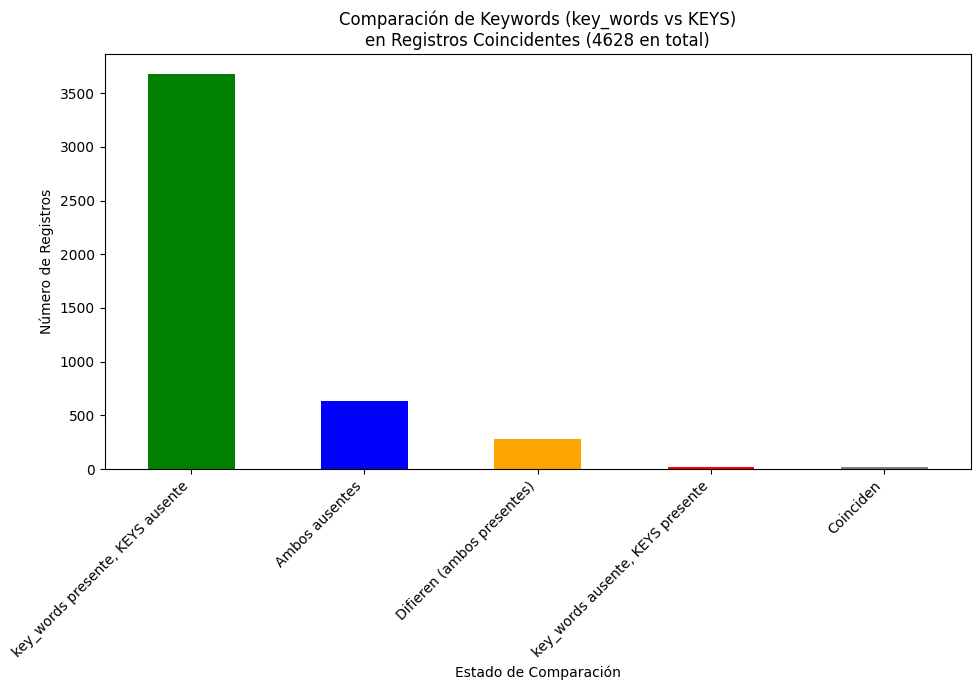

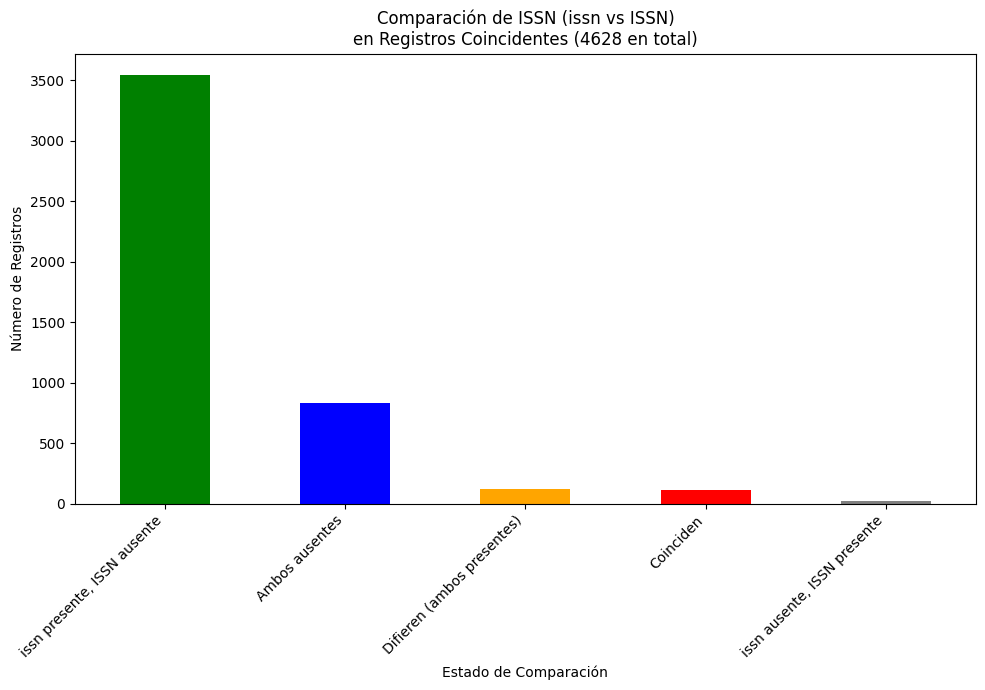

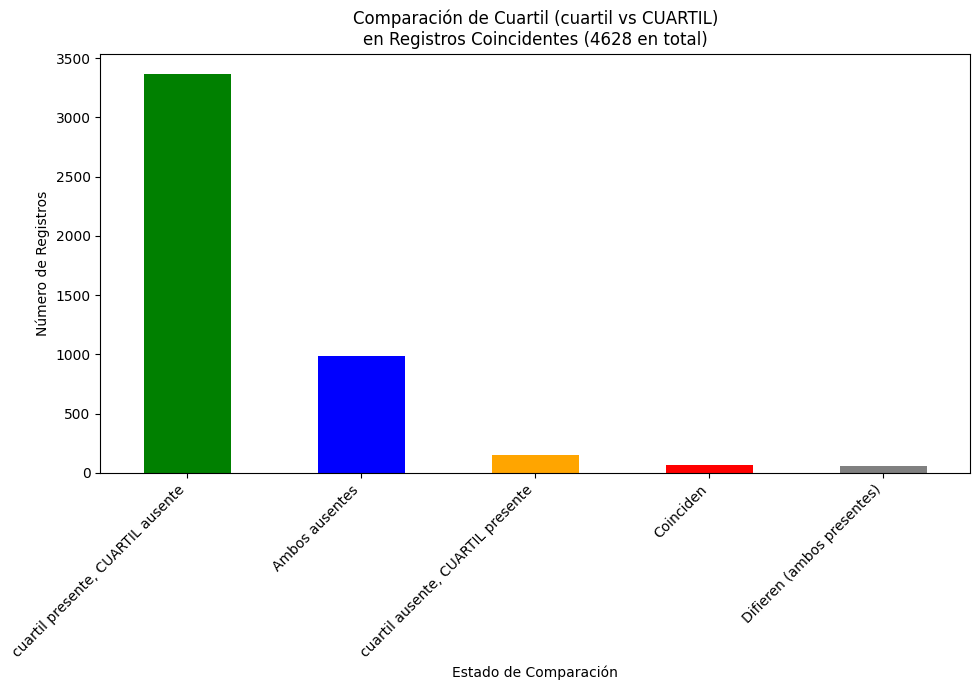

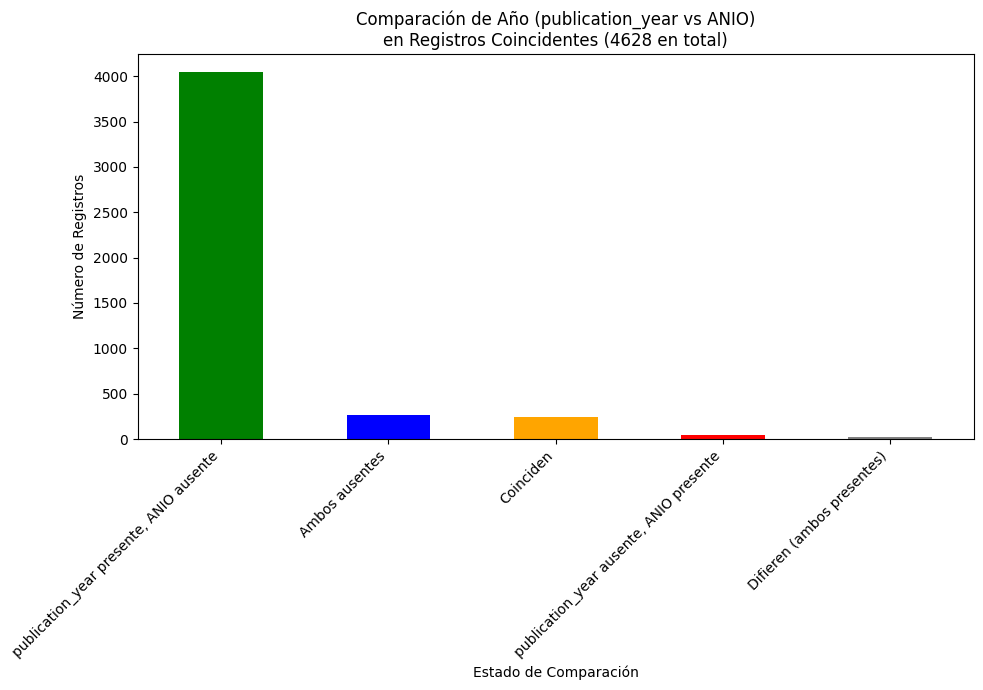

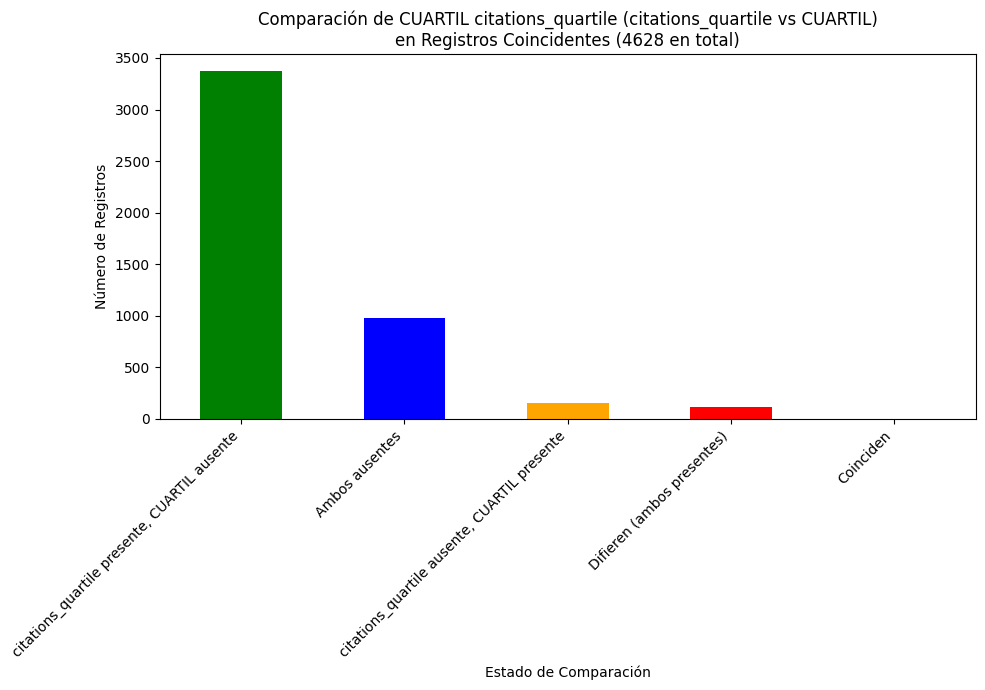

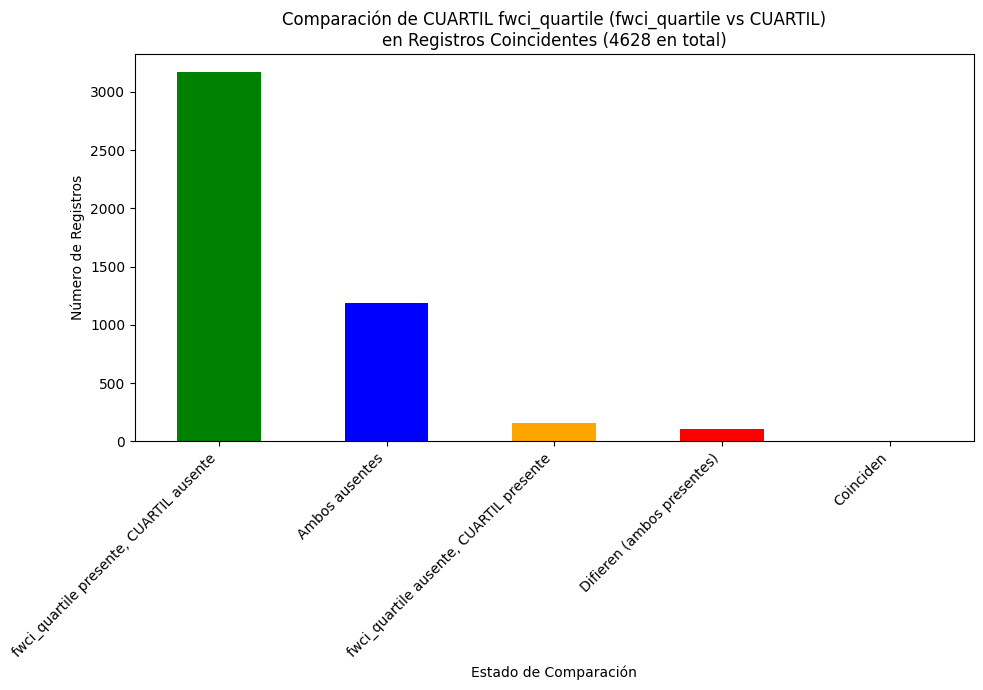


--- Resumen Final ---
Filas en df_scrap original: 4605
Filas en df_all original: 494
Filas en result (merge): 4628
Filas en df_matched (coincidentes según 'ISSN'): 256
Filas en df_scrap_no_match: 4310
Filas en df_all_no_match: 176


In [18]:
show_description(result)

In [20]:
df_scrap.head()

,eid,url,title,abstract,key_words,doi,isbn,issn,cuartil,document_type,source_type,publisher,language,sponsors,publication_year,page_count,info_more_full,citations_quartile,fwci_quartile,indexed_keywords,topic_prominence_name,topic_prominence_value,readers_count,news_mentions_count,citations_scopus_count,fwci_value,zero_hunger,clean_water,affordable_energy,industry_innovation,TITULO
0,2-s2.0-28444483175,https://www.scopus.com/record/display.uri?eid=...,Pathogenicity of white spot syndrome virus on ...,White Spot Syndrome Virus (WSSV) has decimated...,"Breeding, Challenge test, Larval stages, Penae...",10.1016/j.aquaculture.2005.03.044,NaN,00448486,Q2,Article,Journal,NaN,English,NaN,2005.0,6,"AquacultureVolume 250, Issue 3-4, Pages 586 - ...",Q3,Q4,"Decapoda (Crustacea);, Litopenaeus vannamei;, ...",White Spot Syndrome Virus; Shrimp; Viral Disease,92.293,71.0,NaN,3161th percentile,0.56,NaN,NaN,NaN,NaN,Pathogenicity of white spot syndrome virus on ...
1,2-s2.0-33751302754,https://www.scopus.com/record/display.uri?eid=...,Detecting convergence in genetic algorithms wi...,The efficiency and effectiveness of Real-Coded...,"Convergence, Diversity index, Genetic algorith...",NaN,"0889864810, 978-088986481-8",NaN,NaN,Conference Paper,Conference Proceedings,NaN,English,IASTED,2005.0,6,Proceedings of the IASTED International Confer...,NaN,NaN,"Computational methods;, Convergence of numeric...",Genetic Algorithm; Crossover Operator; Global ...,66.848,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detecting convergence in genetic algorithms wi...
2,2-s2.0-30144437338,https://www.scopus.com/record/display.uri?eid=...,Observed trends in indices of daily temperatur...,A workshop on enhancing climate change indices...,NaN,10.1175/JCLI3589.1,NaN,08948755,Q1,Article• Bronze Open Access• Green Open Access,Journal,NaN,English,NaN,2005.0,13,"Journal of ClimateOpen AccessVolume 18, Issue ...",Q1,Q4,"South America, Atmospheric temperature;, Clima...",China; Trend Analysis; Extreme Event,94.638,349.0,NaN,37095th percentile,3.97,NaN,NaN,NaN,NaN,Observed trends in indices of daily temperatur...
3,2-s2.0-27344459102,https://www.scopus.com/record/display.uri?eid=...,Uncertainty evaluation of out-of-plane displac...,Electronic speckle-pattern interferometry (ESP...,"Displacement fields, Monte Carlo method, Speck...",10.1088/0957-0233/16/11/031,NaN,09570233,Q3,Article,Journal,Institute of Physics Publishing,English,NaN,2005.0,10,"Measurement Science and TechnologyVolume 16, I...",Q4,Q4,"Interferometry;, measurement method;, optical ...",Interferometry; Shearography; Vibration Analysis,74.926,7.0,NaN,348th percentile,0.25,NaN,NaN,NaN,NaN,Uncertainty evaluation of out-of-plane displac...
4,2-s2.0-19944374128,https://www.scopus.com/record/display.uri?eid=...,Climatology of surface ultraviolet-radiation i...,"Despite the lack of long-term records, it is p...","Climatology, Ozone, UV irradiance",10.1016/j.enconman.2005.02.008,NaN,01968904,Q3,Article,Journal,NaN,English,NaN,2005.0,12,"Energy Conversion and ManagementVolume 46, Iss...",Q4,NaN,"Clouds;, Correlation methods;, Distillation co...",Solar Radiation; Irradiance; Radiative Transfer,78.012,15.0,NaN,1840th percentile,NaN,NaN,NaN,NaN,NaN,Climatology of surface ultraviolet-radiation i...
